In [11]:
import os
import sys
sys.path.append('../../')
from utils import load_results_from_h5, save_results_to_h5
from tqdm import tqdm
import numpy as np
import pylab as plt

In [13]:
project_dir = '/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study'
#netw = 'CE4020ET123'
netw = 'Asharp'
pop_num = 4
if pop_num == 2:
    pop_model_str = 'MD'
elif pop_num == 4:
    pop_model_str = 'MDhigh_zp_2.53'
elif pop_num == 5:
    pop_model_str = 'MDlow_zp_1.54'
if netw == 'CE4020ET123':
    netw_str = netw+'_CoBA10'
elif netw == 'Asharp':
    netw_str = 'LHI_' + netw
file_name = '_'.join([netw_str, str(pop_num), 'PLP_z', pop_model_str, 
                      'zmax_10_lmrd_22_no_spins_posteriors_10K_4690_events_pop_from_XPHM_fm2_netw.h5'])
posterior_file = os.path.join(project_dir, 'event_posterior_files', 'BBH', netw, 'GWFish', file_name)
posterior_file

'/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/event_posterior_files/BBH/Asharp/GWFish/LHI_Asharp_4_PLP_z_MDhigh_zp_2.53_zmax_10_lmrd_22_no_spins_posteriors_10K_4690_events_pop_from_XPHM_fm2_netw.h5'

In [14]:
posterior_data_total = load_results_from_h5(posterior_file)

In [15]:
posterior_data_total['event_0'].keys()

dict_keys(['chirp_mass', 'chirp_mass_source', 'log_chirp_mass', 'log_luminosity_distance', 'luminosity_distance', 'mass_1', 'mass_1_source', 'mass_2', 'mass_2_source', 'mass_ratio', 'redshift'])

## Add total_mass_source to the data

In [10]:
for key in tqdm(posterior_data_total.keys()):
    posterior_data_total[key]['total_mass_source'] = posterior_data_total[key]['mass_1_source'] + posterior_data_total[key]['mass_2_source']

100%|██████████| 3667/3667 [00:00<00:00, 25074.89it/s]


## Divide the posteriors into mass bands

In [6]:
def get_nth_percentile(data, n):
    return np.percentile(data, n)

In [7]:
posteriors_mass_bands = {'<40': {}, '40-80': {}, '>80': {}}
for key, val in tqdm(posterior_data_total.items()):
    c50 = get_nth_percentile(val['total_mass_source'], 50)
    if c50 < 40:
        posteriors_mass_bands['<40'][key] = val
    elif 40 <= c50 <= 80:
        posteriors_mass_bands['40-80'][key] = val
    else:
        posteriors_mass_bands['>80'][key] = val

100%|██████████| 3667/3667 [00:01<00:00, 2834.72it/s]


In [8]:
M_mins = {}
M_maxs = {}
for key, val in tqdm(posteriors_mass_bands.items()):
    M_mins[key] = [min(posteriors_mass_bands[key][ev]['total_mass_source']) for ev in posteriors_mass_bands[key].keys()]
    M_maxs[key] = [max(posteriors_mass_bands[key][ev]['total_mass_source']) for ev in posteriors_mass_bands[key].keys()]

100%|██████████| 3/3 [00:03<00:00,  1.18s/it]


Text(0.5, 0, 'Minimum total_mass_source in posterior samples')

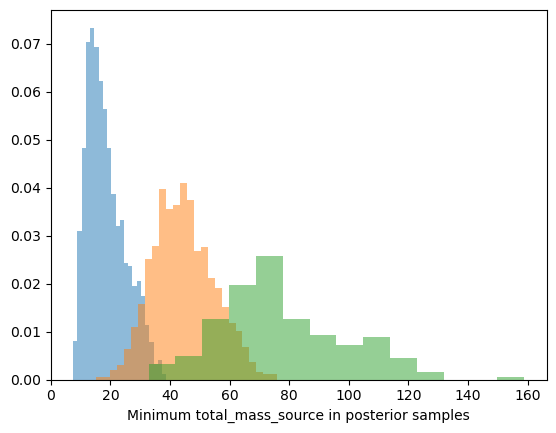

In [9]:
for key in M_mins.keys():
    plt.hist(M_mins[key], bins='auto', alpha=0.5, label=key, density=True)
plt.xlabel('Minimum total_mass_source in posterior samples')

Text(0.5, 0, 'Maximum total_mass_source in posterior samples')

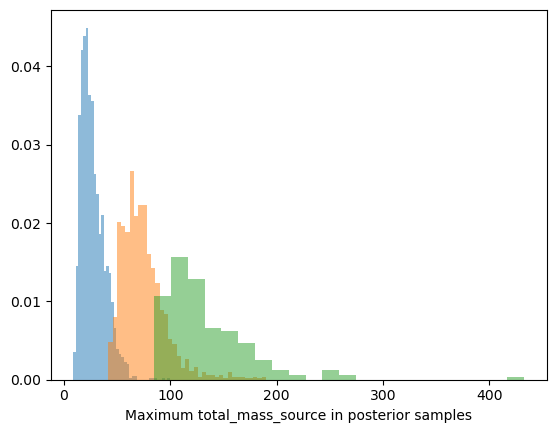

In [10]:
for key in M_maxs.keys():
    plt.hist(M_maxs[key], bins='auto', alpha=0.5, label=key, density=True)
plt.xlabel('Maximum total_mass_source in posterior samples')

## Save to h5 file

In [11]:
posteriors_mass_bands['<40']['event_0'].keys()

dict_keys(['chirp_mass', 'chirp_mass_source', 'log_chirp_mass', 'log_luminosity_distance', 'luminosity_distance', 'mass_1', 'mass_1_source', 'mass_2', 'mass_2_source', 'mass_ratio', 'redshift', 'total_mass_source'])

In [12]:
file_name

'LHI_Asharp_5_PLP_z_MDlow_zp_1.54_zmax_10_lmrd_22_no_spins_posteriors_10K_3667_events_pop_from_XPHM_fm2_netw.h5'

In [13]:
num_events = file_name.split('_events_')[0].split('_')[-1]
num_events

'3667'

In [14]:
for mass_band in posteriors_mass_bands.keys():
    mass_band_str = mass_band.replace('<', 'below_').replace('>', 'above_')
    file_name_mass = file_name.replace(num_events, 
                                       str(len(posteriors_mass_bands[mass_band]))).replace('.h5', 
                                                                                           f'_{mass_band_str}.h5')
    file_path_mass = os.path.join(project_dir, 'event_posterior_files', 'BBH', netw, 
                                  'GWFish', 'mass_bands', file_name_mass)
    print(file_path_mass)
    save_results_to_h5(posteriors_mass_bands[mass_band], file_path_mass)

/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/event_posterior_files/BBH/Asharp/GWFish/mass_bands/LHI_Asharp_5_PLP_z_MDlow_zp_1.54_zmax_10_lmrd_22_no_spins_posteriors_10K_1911_events_pop_from_XPHM_fm2_netw_below_40.h5
/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/event_posterior_files/BBH/Asharp/GWFish/mass_bands/LHI_Asharp_5_PLP_z_MDlow_zp_1.54_zmax_10_lmrd_22_no_spins_posteriors_10K_1554_events_pop_from_XPHM_fm2_netw_40-80.h5
/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/event_posterior_files/BBH/Asharp/GWFish/mass_bands/LHI_Asharp_5_PLP_z_MDlow_zp_1.54_zmax_10_lmrd_22_no_spins_posteriors_10K_202_events_pop_from_XPHM_fm2_netw_above_80.h5


## Considering only redshift posterior for gwpop analysis

### Create prior on redshift

$p(z)dz = p(\log D_L) d(\log D_L)$

Since the posteriors were drawn from a Multivariate Gaussian created on $\log\mathcal{M}_c$, $q$, and $\log D_L$, the priors are uniform on these parameters.

Hence,

$p(z) = p(\log D_L) \frac{1}{D_L} \left| \frac{dD_L(z)}{dz} \right| \propto \frac{1}{D_L} \left| \frac{dD_L(z)}{dz} \right|$

since $p(log(D_L)) = const$

In [15]:
def calc_dDL_dz(DL_arr, z_arr):
    """
    Parameters: 
    ----------------------
    z_arr: numpy array
        redshift value
    DL_arr: numpy array
        Luminosity distance (Mpc)

    Returns:
    --------------------------
    dDL_dz : scipy.interpolate.UnivariateSpline
        Derivative spline giving dDL/dz
    """
    
    sort_idx = np.argsort(DL_arr)
    DL_sorted = DL_arr[sort_idx]
    z_sorted = z_arr[sort_idx]
    
    fDL = UnivariateSpline(z_sorted, DL_sorted, s=0)
    dfDL_dz = fDL.derivative()
    return(dfDL_dz)

In [16]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
from pycbc import cosmology
from scipy.interpolate import UnivariateSpline

DL_grid = np.linspace(1, 13e4, 10000)
z_grid = cosmology.redshift(DL_grid, cosmology='Planck18')
print('z_max =', z_grid.max())
dDL_dz_interp = calc_dDL_dz(DL_grid, z_grid)

z_max = 11.979426122089338


In [17]:
import pandas as pd

posteriors_z_list = {}
for mass_band in posteriors_mass_bands.keys():
    posteriors_z_list[mass_band] = []
    print(mass_band)
    for event in tqdm(posteriors_mass_bands[mass_band].keys()):
        zi = posteriors_mass_bands[mass_band][event]['redshift']
        DLi = posteriors_mass_bands[mass_band][event]['luminosity_distance']
        prior_zi = dDL_dz_interp(zi)/DLi
        #prior_zi_normalized = prior_zi/np.trapz(prior_zi, zi)
        prior_zi_normalized = prior_zi/np.sum(prior_zi)
        event_i = {'redshift': zi,
                'prior': prior_zi_normalized}
        posteriors_z_list[mass_band].append(pd.DataFrame(event_i))

<40


100%|██████████| 1911/1911 [00:02<00:00, 779.55it/s]


40-80


100%|██████████| 1554/1554 [00:02<00:00, 561.04it/s]


>80


100%|██████████| 202/202 [00:00<00:00, 541.38it/s]


### Plot the priors

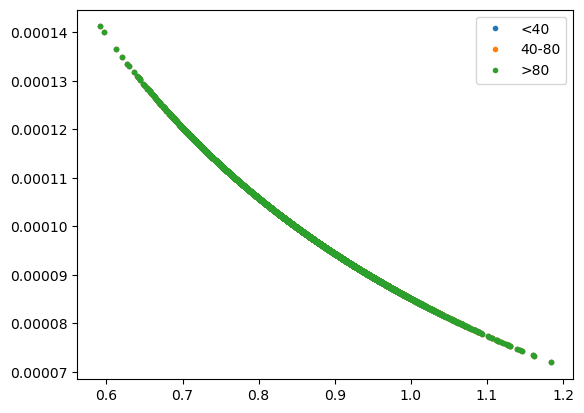

In [18]:
for mass_band in posteriors_mass_bands.keys():
    plt.plot(zi, prior_zi_normalized, '.', label=mass_band)
plt.legend(loc=1)

### Save to pickle file

In [19]:
num_events

'3667'

In [20]:
file_paths_mass = {}
for mass_band in posteriors_mass_bands.keys():
    mass_band_str = mass_band.replace('<', 'below_').replace('>', 'above_')
    file_name_mass = file_name.replace(num_events, 
                                       str(len(posteriors_mass_bands[mass_band]))).replace('.h5', 
                                                                                           f'_{mass_band_str}.pkl')
    file_path_mass = os.path.join(project_dir, 'gwpopulation', 'BBH', 'posteriors_from_GWFish', 
                                  'mass_bands', file_name_mass)
    file_paths_mass[mass_band] = file_path_mass
    print(file_path_mass)

/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/gwpopulation/BBH/posteriors_from_GWFish/mass_bands/LHI_Asharp_5_PLP_z_MDlow_zp_1.54_zmax_10_lmrd_22_no_spins_posteriors_10K_1911_events_pop_from_XPHM_fm2_netw_below_40.pkl
/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/gwpopulation/BBH/posteriors_from_GWFish/mass_bands/LHI_Asharp_5_PLP_z_MDlow_zp_1.54_zmax_10_lmrd_22_no_spins_posteriors_10K_1554_events_pop_from_XPHM_fm2_netw_40-80.pkl
/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/gwpopulation/BBH/posteriors_from_GWFish/mass_bands/LHI_Asharp_5_PLP_z_MDlow_zp_1.54_zmax_10_lmrd_22_no_spins_posteriors_10K_202_events_pop_from_XPHM_fm2_netw_above_80.pkl


In [21]:
# commented out to avoid accidental overwriting
for mass_band in posteriors_mass_bands.keys():
    pd.to_pickle(posteriors_z_list[mass_band], file_paths_mass[mass_band])